# 学习曲线

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve, ShuffleSplit
%matplotlib inline


In [9]:
def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=-1,
                        train_sizes=[0.01, 0.02, 0.05, 0.1, 0.2, 0.3]):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        # scoring=myeval,
        n_jobs=n_jobs,
        train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [12]:
train_data = pd.read_csv("./zhengqi_train.txt",sep="\t")

column_index = [i for i in train_data.columns if i !="target"]

X = train_data[column_index].values
y = train_data["target"].values

<module 'matplotlib.pyplot' from '/Library/Python/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

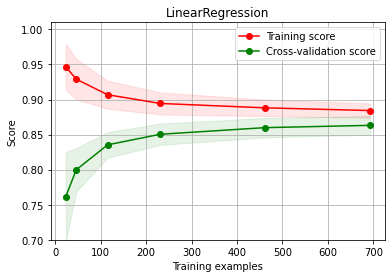

In [15]:
#测试
plt.figure(figsize=(18,10),dpi=150) #指定大小
#顺便使用一个模型进行测试，比如SGD
title = "LinearRegression"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=428)
eastimator = SGDRegressor()
plot_learning_curve(eastimator,title,X,y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)


# 验证曲线

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve, ShuffleSplit
%matplotlib inline

In [8]:
train_data = pd.read_csv("./zhengqi_train.txt",sep="\t")

column_index = [i for i in train_data.columns if i !="target"]

X = train_data[column_index].values
y = train_data["target"].values

In [21]:
def plot_validate_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        param_name = None,
                        param_range = None,
                        cv=None,
                        scoring = None,
                        n_jobs=-1):
    plt.figure()
    plt.title(title)
    plt.xlabel("alpha")
    plt.ylabel("Score")
    if ylim is not None:
        plt.ylim(*ylim)
    train_scores, test_scores = validation_curve(
        estimator,
        X,
        y,
        param_name = param_name,
        param_range = param_range,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.semilogx(param_range,
                 train_scores_mean,
                 label = "Training score",
                 color = "r")
    plt.fill_between(param_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2,
                 color="r")
    plt.semilogx(param_range,
             test_scores_mean,
             label = "Cross-validation score",
             color = "g")
    plt.fill_between(param_range,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.2,
                     color="g")
    # plt.plot(train_sizes,
    #          train_scores_mean,
    #          'o-',
    #          color="r",
    #          label="Training score")
    # plt.plot(train_sizes,
    #          test_scores_mean,
    #          'o-',
    #          color="g",
    #          label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    # return plt

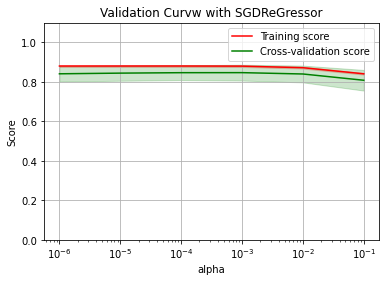

In [22]:
plot_validate_curve(SGDRegressor(max_iter=1000,tol=1e-3,penalty="L1"),
                    title = "Validation Curvw with SGDReGressor",
                 X=X,
                 y=y,
                 ylim=(0.0,1.1),
                 param_name="alpha",
                 param_range=[0.1,0.01,0.001,0.0001,0.00001,0.000001],
                 cv=10,
                 scoring="r2",
                 n_jobs=-1)